In [1]:
import pandas as pd
import numpy as np
import datamol as dm

In [2]:
df = pd.read_csv("popova.csv")
df

,Unnamed: 0,SMILES,Kow
0,1,CC1CC2C3CCC4=CC(=O)C=CC4(C)C3(F)C(O)CC2(C)C1(O...,1.885
1,2,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.190
2,3,CC(=O)OCC(=O)C1(O)CCC2C3CCC4=CC(=O)CCC4(C)C3C(...,2.100
3,4,CCC1(c2ccccc2)C(=O)NC(=O)NC1=O,1.470
4,5,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,-0.400
...,...,...,...
14171,14203,S=C(NN=C(c1ccccn1)c1ccccn1)Nc1ccccc1,1.960
14172,14204,S=C=NCCCCCCCCCCc1ccccc1,6.820
14173,14205,S=C=NCCCCCCCCc1ccccc1,5.810
14174,14206,S=c1[nH]nc(Cn2ccc3ccccc32)n1-c1ccccc1,2.680


In [3]:
smiles = df.SMILES

In [4]:
y = df.Kow

In [5]:
mols = [dm.to_mol(smiles) for smiles in smiles]

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


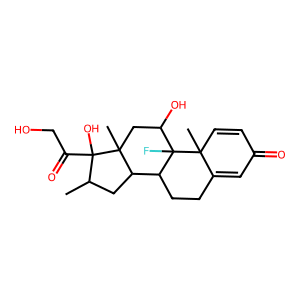

In [6]:
dm.to_image(mols=mols[0])

In [7]:
fps = [dm.to_fp(mol) for mol in mols]

In [8]:
X = pd.DataFrame(data=np.array(fps))
X

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.feature_selection import SequentialFeatureSelector

In [10]:
kf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=42)

In [11]:
svr = svm.SVR(C=100)

In [12]:
pipe = make_pipeline(
    SequentialFeatureSelector(estimator=svr, n_features_to_select=50, n_jobs=-1), svr
)

In [13]:
scores = cross_val_score(svr, X, y, cv=kf, n_jobs=12)

In [14]:
scores.mean()

0.8505331869577699